In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", 100) 
%matplotlib inline

In [3]:
#ProPublica COMPASS dataset - reached out to congressional staff, nonprofits, etc.
#ultimately I found stuff from Kaggle - where they do data science competitions - for the state of Florida

In [4]:
file_name1 = "compas-scores-raw.csv"
df1=pd.read_csv(file_name1)
print("Shape: {0}".format(df1.shape))
df1.head(3)
#The data itself has (60,000 rows and 28 columns) 

Shape: (60843, 28)


,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0


In [6]:
df1.columns
#some of these factors are obvious, some I've never seen before
#so I did some exploring to figure out just what some of these factors are

Index(['Person_ID', 'AssessmentID', 'Case_ID', 'Agency_Text', 'LastName',
       'FirstName', 'MiddleName', 'Sex_Code_Text', 'Ethnic_Code_Text',
       'DateOfBirth', 'ScaleSet_ID', 'ScaleSet', 'AssessmentReason',
       'Language', 'LegalStatus', 'CustodyStatus', 'MaritalStatus',
       'Screening_Date', 'RecSupervisionLevel', 'RecSupervisionLevelText',
       'Scale_ID', 'DisplayText', 'RawScore', 'DecileScore', 'ScoreText',
       'AssessmentType', 'IsCompleted', 'IsDeleted'],
      dtype='object')

### Exploring the columns

In [5]:
df1.nunique(axis=0, dropna=True)

Person_ID                  18610
AssessmentID               20281
Case_ID                    19530
Agency_Text                    4
LastName                   10896
FirstName                   7225
MiddleName                  1871
Sex_Code_Text                  2
Ethnic_Code_Text               9
DateOfBirth                10382
ScaleSet_ID                    2
ScaleSet                       2
AssessmentReason               1
Language                       2
LegalStatus                    7
CustodyStatus                  6
MaritalStatus                  7
Screening_Date               705
RecSupervisionLevel            4
RecSupervisionLevelText        4
Scale_ID                       3
DisplayText                    3
RawScore                     659
DecileScore                   11
ScoreText                      3
AssessmentType                 2
IsCompleted                    1
IsDeleted                      1
dtype: int64

In [6]:
# There are some columns that have only one value: IsCompleted, IsDeleted, AssessmentReason. 
print(df1.IsCompleted.unique(), df1.IsDeleted.unique(), df1.AssessmentReason.unique())
drop_cols= ["IsCompleted", "IsDeleted", "AssessmentReason"]
# These columns are not useful for analysis
df1.drop(drop_cols, axis=1, inplace=True)

[1] [0] ['Intake']


In [7]:
df1.DisplayText.unique() #there were ~18k people for ~60k rows, so roughly 3 rows per person
#ScoreID,DisplayText,ScoreText have 3 values. ID is hard to interpret. So looking at DisplayText first
#DisplayText has 3 unique values, so they might vary by DisplayText

array(['Risk of Violence', 'Risk of Recidivism',
       'Risk of Failure to Appear'], dtype=object)

In [8]:
df1.loc[(df1.DisplayText=="Risk of Violence"),].shape

(20281, 25)

In [9]:
df1.loc[(df1.DisplayText=="Risk of Recidivism"),].shape

(20281, 25)

In [10]:
df1.loc[(df1.DisplayText=="Risk of Failure to Appear"),].shape

(20281, 25)

In [11]:
#Maybe the same people, maybe not - dont know yet

### Risk of Violence Analysis

In [12]:
dfrv = df1.loc[(df1.DisplayText=="Risk of Violence"),].copy()
dfrv.shape
#Out of 60,000 records, 20,281 are for Risk of Violence. Analyzing further

(20281, 25)

In [13]:
dfrv.head(5)

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,ScaleSet,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,Risk and Prescreen,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,7,Risk of Violence,-2.08,4,Low,New
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,22,Risk and Prescreen,English,Pretrial,Jail Inmate,Married,1/1/13 0:00,1,Low,7,Risk of Violence,-2.84,2,Low,New
6,50855,57181,51963,PRETRIAL,DAYES,DANIEL,NaN,Male,African-American,08/25/94,22,Risk and Prescreen,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,4,High,7,Risk of Violence,-1.20,8,High,New
9,50850,57176,51958,PRETRIAL,Debe,Mikerlie,George,Female,African-American,10/09/94,22,Risk and Prescreen,English,Pretrial,Jail Inmate,Significant Other,1/1/13 0:00,2,Medium,7,Risk of Violence,-1.29,7,Medium,New
12,50839,57162,51945,PRETRIAL,McLaurin,Stephanie,Nicole,Female,African-American,06/29/85,22,Risk and Prescreen,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,7,Risk of Violence,-2.90,2,Low,New


In [14]:
dfrv.nunique(axis=0, dropna=True)

Person_ID                  18610
AssessmentID               20281
Case_ID                    19530
Agency_Text                    4
LastName                   10896
FirstName                   7225
MiddleName                  1871
Sex_Code_Text                  2
Ethnic_Code_Text               9
DateOfBirth                10382
ScaleSet_ID                    2
ScaleSet                       2
Language                       2
LegalStatus                    7
CustodyStatus                  6
MaritalStatus                  7
Screening_Date               705
RecSupervisionLevel            4
RecSupervisionLevelText        4
Scale_ID                       1
DisplayText                    1
RawScore                     485
DecileScore                   11
ScoreText                      3
AssessmentType                 2
dtype: int64

In [15]:
#Scale_ID, DisplayText, AssessmentID can be dropped
#These have only 1 value or all different values
drop_cols=["Scale_ID", "DisplayText", "AssessmentID"]
dfrv.drop(drop_cols, axis=1, inplace=True)

dfrv.shape

(20281, 22)

In [16]:
#Drop rows with NA values - null not useful
df = dfrv.loc[dfrv.ScoreText.isna()==False].copy()

In [17]:
df.shape

(20272, 22)

In [18]:
df.nunique(axis=0, dropna=True)

Person_ID                  18603
Case_ID                    19521
Agency_Text                    4
LastName                   10893
FirstName                   7223
MiddleName                  1871
Sex_Code_Text                  2
Ethnic_Code_Text               9
DateOfBirth                10380
ScaleSet_ID                    2
ScaleSet                       2
Language                       2
LegalStatus                    7
CustodyStatus                  6
MaritalStatus                  7
Screening_Date               705
RecSupervisionLevel            4
RecSupervisionLevelText        4
RawScore                     485
DecileScore                   10
ScoreText                      3
AssessmentType                 2
dtype: int64

In [19]:
#Columns I need to dive deeper to understand correlations

### What are RawScores, DecileScores, ScoreText? Are they related?

In [20]:
#looks like these scores quantify Risk of Violence
df[["RawScore", "DecileScore", "ScoreText"]].head(3)

,RawScore,DecileScore,ScoreText
0,-2.08,4,Low
3,-2.84,2,Low
6,-1.20,8,High


In [21]:
df.RawScore.min(), df.RawScore.max()

(-4.79, 1.52)

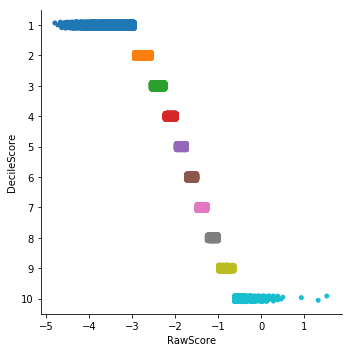

In [22]:
#Correlation between Rawscore and DecileScore - Looks like it is a calculated field. They are definitely correlated.
sns.catplot(x="RawScore", y="DecileScore", data=df, orient="h")

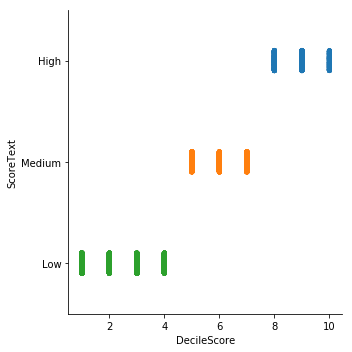

In [23]:
#Correlation between ScoreText and DecileScore - 
#Looks like there are also calculated field. They are definitely correlated.
sns.catplot(x="DecileScore", y="ScoreText", data=df, orient="h", order=["High", "Medium", "Low"])

### What are Agency_Text, LegalStatus?

In [24]:
df.Agency_Text.value_counts()

PRETRIAL          13694
Probation          6349
DRRD                188
Broward County       41
Name: Agency_Text, dtype: int64

In [25]:
#What is DRRD and Broward County? 
row_vals=["DRRD", "Broward County"]
df_drrd = df.loc[(df.Agency_Text.isin(row_vals)),].copy()
df_drrd.Agency_Text.value_counts()

DRRD              188
Broward County     41
Name: Agency_Text, dtype: int64

In [26]:
df_drrd.LegalStatus.value_counts()

Pretrial               90
Post Sentence          84
Probation Violator     27
Conditional Release    13
Other                  11
Deferred Sentencing     4
Name: LegalStatus, dtype: int64

In [27]:
#Removing DRRD and Broward County for now
df = df.loc[~(df.Agency_Text.isin(row_vals)),].copy()

df.shape

(20043, 22)

In [28]:
df.LegalStatus.value_counts()

Pretrial               12431
Post Sentence           6026
Other                   1439
Conditional Release      126
Probation Violator        15
Parole Violator            6
Name: LegalStatus, dtype: int64

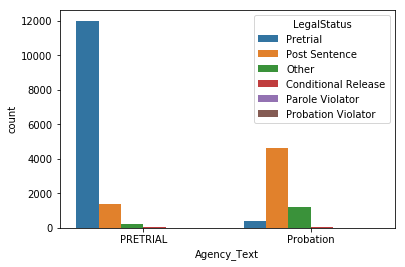

In [29]:
#Correlation between LegalStatus and Agency_Text?

sns.countplot(x='Agency_Text',hue='LegalStatus',data=df)

### Correlation of RecSupervisionLevel  with Gender

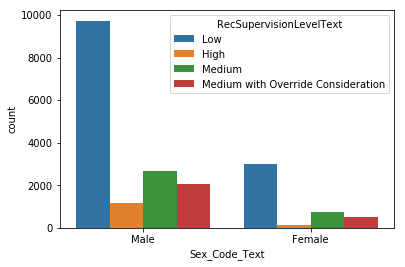

In [30]:
sns.countplot(x='Sex_Code_Text',hue='RecSupervisionLevelText',data=df)

In [31]:
cb=pd.crosstab(index=df["Sex_Code_Text"],columns=df["RecSupervisionLevelText"], normalize='index')
cb

RecSupervisionLevelText,High,Low,Medium,Medium with Override Consideration
Sex_Code_Text,,,,
Female,0.029739,0.684222,0.173666,0.112372
Male,0.075713,0.622330,0.170610,0.131347


### Correlation of Agency_Text  with Gender

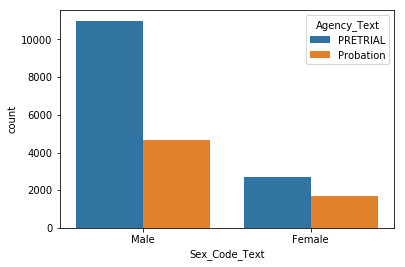

In [32]:
sns.countplot(x='Sex_Code_Text',hue='Agency_Text',data=df)

### Correlation of Scores  with Gender

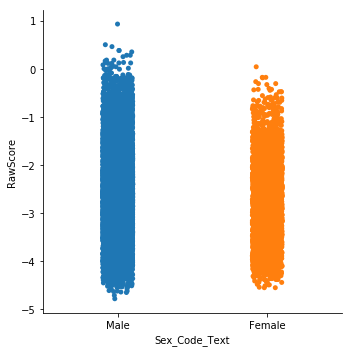

In [33]:
sns.catplot(x="Sex_Code_Text", y="RawScore", data=df)

In [34]:
cb=pd.crosstab(index=df["Sex_Code_Text"],columns=df["ScoreText"], normalize='index')
cb

ScoreText,High,Low,Medium
Sex_Code_Text,,,
Female,0.034960,0.813621,0.151419
Male,0.093746,0.702008,0.204246


### Correlation of Scores  with Ethnicity

In [35]:
#African-American is coded as African-Am as well. Combined the definitions
df.loc[df.Ethnic_Code_Text == 'African-Am', 'Ethnic_Code_Text'] = 'African-American'

In [36]:
df.Ethnic_Code_Text.value_counts()

African-American    8862
Caucasian           7217
Hispanic            2888
Other                859
Asian                108
Native American       72
Arabic                24
Oriental              13
Name: Ethnic_Code_Text, dtype: int64

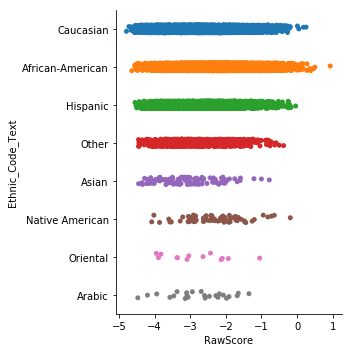

In [37]:
sns.catplot(x="RawScore", y="Ethnic_Code_Text", data=df, orient='h')

In [38]:
cb=pd.crosstab(index=df["Ethnic_Code_Text"],columns=df["ScoreText"], normalize='index')
cb

ScoreText,High,Low,Medium
Ethnic_Code_Text,,,
African-American,0.132927,0.591853,0.275220
Arabic,0.000000,0.833333,0.166667
Asian,0.027778,0.925926,0.046296
Caucasian,0.039629,0.830123,0.130248
Hispanic,0.041205,0.842798,0.115997
Native American,0.083333,0.694444,0.222222
Oriental,0.076923,0.846154,0.076923
Other,0.031432,0.827707,0.140861


In [39]:
#Actual numbers
cb=pd.crosstab(index=df["Ethnic_Code_Text"],columns=df["ScoreText"])
cb

ScoreText,High,Low,Medium
Ethnic_Code_Text,,,
African-American,1178,5245,2439
Arabic,0,20,4
Asian,3,100,5
Caucasian,286,5991,940
Hispanic,119,2434,335
Native American,6,50,16
Oriental,1,11,1
Other,27,711,121


## OLD CODE BELOW

In [103]:
dfrv.Agency_Text.unique()

array(['PRETRIAL', 'Probation', 'DRRD', 'Broward County'], dtype=object)

In [104]:
dfrv.RecSupervisionLevelText.unique()

array(['Low', 'High', 'Medium', 'Medium with Override Consideration'],
      dtype=object)

In [109]:
dfrv.ScoreText.unique()

array(['Low', 'High', 'Medium', nan], dtype=object)

#### There are some columns that have 2 values: AssessmentType, Language, Sex_Code_Text, ScaleSet, ScaleSet_ID. 

In [37]:
df1.Language.unique()

array(['English', 'Spanish'], dtype=object)

In [39]:
df1.Sex_Code_Text.unique()

array(['Male', 'Female'], dtype=object)

In [41]:
df1.ScaleSet.unique(), df1.ScaleSet_ID.unique(), 

(array(['Risk and Prescreen', 'All Scales'], dtype=object), array([22, 17]))

#### There are some columns that have 2 values: AssessmentType, Language, Sex_Code_Text, ScaleSet, ScaleSet_ID. 

In [63]:
file_name2 = "archive/cox-violent-parsed.csv"
df2=pd.read_csv(file_name2)
print("Shape: {0}".format(df2.shape))
df2.head(3)

Shape: (18316, 52)


,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event
0,1.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,0,1,0,0,0,-1.0,13/08/2013 6:03,14/08/2013 5:41,13011352CF10A,13/08/2013,NaN,1.0,(F3),Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,0,327,0
1,2.0,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,0,1,0,0,0,-1.0,13/08/2013 6:03,14/08/2013 5:41,13011352CF10A,13/08/2013,NaN,1.0,(F3),Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,14/08/2013,07/07/2014,14/07/2014,0,334,961,0
2,3.0,michael ryan,michael,ryan,31/12/2014,Male,06/02/1985,31,25 - 45,Caucasian,0,5,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,5,Medium,31/12/2014,Risk of Violence,2,Low,31/12/2014,30/12/2014,03/01/2015,0,3,457,0


In [50]:
df2.columns

Index(['id', 'name', 'first', 'last', 'sex', 'dob', 'age', 'age_cat', 'race',
       'juv_fel_count', 'decile_score', 'juv_misd_count', 'juv_other_count',
       'priors_count', 'days_b_screening_arrest', 'c_jail_in', 'c_jail_out',
       'c_days_from_compas', 'c_charge_degree', 'c_charge_desc', 'is_recid',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'violent_recid', 'is_violent_recid',
       'vr_charge_degree', 'vr_offense_date', 'vr_charge_desc',
       'type_of_assessment', 'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'priors_count.1', 'event'],
      dtype='object')

In [44]:
df2.nunique(axis=0, dropna=True)

id                         11001
name                       10855
first                       3876
last                        5635
compas_screening_date        703
sex                            2
dob                         7485
age                           65
age_cat                        3
race                           6
juv_fel_count                 12
decile_score                  11
juv_misd_count                11
juv_other_count               12
priors_count                  39
days_b_screening_arrest      534
c_jail_in                   9806
c_jail_out                  8714
c_case_number              10309
c_offense_date              1025
c_arrest_date                782
c_days_from_compas           657
c_charge_degree               14
c_charge_desc                513
is_recid                       3
r_case_number               3473
r_charge_degree               10
r_days_from_arrest           201
r_offense_date              1075
r_charge_desc                341
r_jail_in 